In [50]:
import pandas as pd

In [63]:
### loading the data

dataset = pd.read_csv("D:/Python Projects\madden_hourly_reports.csv")
dataset.head()

,car_id,device_timestamp,car_name,customer_account,avg_speed,duty_cycle,max_speed,max_trip_duration,min_speed,trip_end_avg_jerk,trip_end_max_jerk,trip_noise,trip_start_avg_jerk,trip_start_max_jerk,latest_ping_datetime,num_landings,trips,num_pings
0,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,2021-12-02 22:00:00+00,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02 22:59:10.610399+00,2.0,0.0,20
1,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,2021-12-02 21:00:00+00,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02 22:59:10.610399+00,2.0,0.0,20
2,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,2021-12-02 20:00:00+00,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02 22:59:10.610399+00,2.0,0.0,20
3,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,2021-12-02 19:00:00+00,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02 22:59:10.610399+00,2.0,0.0,20
4,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,2021-12-02 18:00:00+00,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02 22:59:10.610399+00,2.0,0.0,20


In [53]:
### selecting and cleaning the tables 

new_data_df = dataset[['car_id', 'device_timestamp', 'avg_speed', 'max_speed', 'max_trip_duration', 'trip_start_max_jerk', 'trip_end_max_jerk', 'trip_noise', 'trips']].copy()
data_df2 = new_data_df.fillna(0)
data_df2.head()

,car_id,device_timestamp,avg_speed,max_speed,max_trip_duration,trip_start_max_jerk,trip_end_max_jerk,trip_noise,trips
0,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,2021-12-02 22:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,2021-12-02 21:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,2021-12-02 20:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,2021-12-02 19:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,2021-12-02 18:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
### statistics calculation for every columns

data_stats_df = data_df2[['max_speed', 'avg_speed', 'max_trip_duration', 'trip_start_max_jerk', 'trip_end_max_jerk', 'trips']].describe()
print(data_stats_df)

          max_speed     avg_speed  max_trip_duration  trip_start_max_jerk  \
count  1.048575e+06  1.048575e+06       1.048575e+06         1.048575e+06   
mean   1.025698e+02  8.581035e+01       7.454092e+00         8.825474e-01   
std    1.472989e+02  1.208915e+02       1.000747e+01         1.207158e+00   
min    0.000000e+00  0.000000e+00       0.000000e+00         0.000000e+00   
25%    0.000000e+00  0.000000e+00       0.000000e+00         0.000000e+00   
50%    0.000000e+00  0.000000e+00       0.000000e+00         0.000000e+00   
75%    1.610000e+02  1.370000e+02       1.510000e+01         1.670000e+00   
max    3.324000e+03  6.040000e+02       3.022400e+03         3.510000e+01   

       trip_end_max_jerk         trips  
count       1.048575e+06  1.048575e+06  
mean        9.195466e-01  7.187558e+00  
std         1.272725e+00  1.651431e+01  
min         0.000000e+00  0.000000e+00  
25%         0.000000e+00  0.000000e+00  
50%         0.000000e+00  0.000000e+00  
75%         1.79000

In [66]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from pylab import rcParams

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [68]:
address = "D:/Python Projects\madden_hourly_reports.csv"
new_data_df = pd.read_csv(address, index_col='device_timestamp', encoding='cp1252', parse_dates=True)

new_data_df.head()


,car_id,car_name,customer_account,avg_speed,duty_cycle,max_speed,max_trip_duration,min_speed,trip_end_avg_jerk,trip_end_max_jerk,trip_noise,trip_start_avg_jerk,trip_start_max_jerk,latest_ping_datetime,num_landings,trips,num_pings
device_timestamp,,,,,,,,,,,,,,,,,
2021-12-02 22:00:00+00:00,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02 22:59:10.610399+00,2.0,0.0,20
2021-12-02 21:00:00+00:00,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02 22:59:10.610399+00,2.0,0.0,20
2021-12-02 20:00:00+00:00,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02 22:59:10.610399+00,2.0,0.0,20
2021-12-02 19:00:00+00:00,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02 22:59:10.610399+00,2.0,0.0,20
2021-12-02 18:00:00+00:00,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02 22:59:10.610399+00,2.0,0.0,20


In [69]:
time_df = new_data_df.fillna(0)
time_df.head()

,car_id,car_name,customer_account,avg_speed,duty_cycle,max_speed,max_trip_duration,min_speed,trip_end_avg_jerk,trip_end_max_jerk,trip_noise,trip_start_avg_jerk,trip_start_max_jerk,latest_ping_datetime,num_landings,trips,num_pings
device_timestamp,,,,,,,,,,,,,,,,,
2021-12-02 22:00:00+00:00,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-02 22:59:10.610399+00,2.0,0.0,20
2021-12-02 21:00:00+00:00,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-02 22:59:10.610399+00,2.0,0.0,20
2021-12-02 20:00:00+00:00,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-02 22:59:10.610399+00,2.0,0.0,20
2021-12-02 19:00:00+00:00,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-02 22:59:10.610399+00,2.0,0.0,20
2021-12-02 18:00:00+00:00,00cb25fc-ce4e-4943-ab4c-b8a57c945f1a,Employee Wellness Center - Louisville Metro - 1,Madden Elevator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-02 22:59:10.610399+00,2.0,0.0,20


<AxesSubplot:xlabel='device_timestamp'>

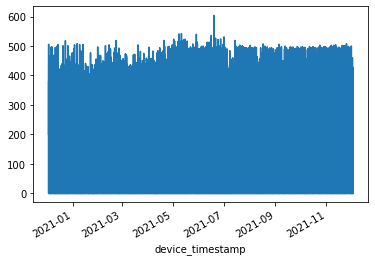

In [70]:
time_df['avg_speed'].plot()

<AxesSubplot:title={'center':'jerk'}, xlabel='device_timestamp', ylabel='trip_end_max_jerk'>

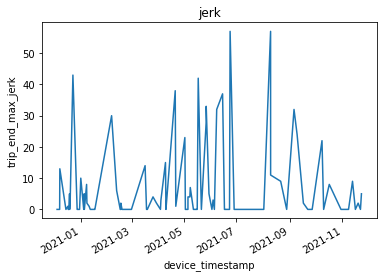

In [81]:
time_df2 = time_df.sample(n = 100, random_state = 50, axis=0 )
plt.xlabel('trip_start_max_jerk')
plt.ylabel('trip_end_max_jerk')
plt.title('jerk')

time_df2['trips'].plot()

<AxesSubplot:>

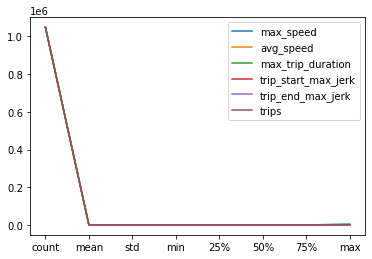

In [71]:
data_stats_df.plot()